In [1]:
import pandas as pd

In [2]:
a = pd.read_csv(r"C:\Users\91845\Downloads\airquality.csv")

In [3]:
a

,Unnamed: 0,Ozone,Solar.R,Wind,Temp,Month,Day,humidity
0,1,41.0,190.0,7.4,67,5,1,high
1,2,36.0,118.0,8.0,72,5,2,high
2,3,12.0,149.0,12.6,74,5,3,high
3,4,18.0,313.0,11.5,62,5,4,high
4,5,NaN,NaN,14.3,56,5,5,high
...,...,...,...,...,...,...,...,...
148,149,30.0,193.0,6.9,70,9,26,high
149,150,NaN,145.0,13.2,77,9,27,high
150,151,14.0,191.0,14.3,75,9,28,high
151,152,18.0,131.0,8.0,76,9,29,high


In [4]:
a.isnull().sum()

Unnamed: 0     0
Ozone         37
Solar.R        7
Wind           0
Temp           0
Month          0
Day            0
humidity       4
dtype: int64

In [5]:
df = a.drop('Unnamed: 0', axis=1)

In [6]:
df

,Ozone,Solar.R,Wind,Temp,Month,Day,humidity
0,41.0,190.0,7.4,67,5,1,high
1,36.0,118.0,8.0,72,5,2,high
2,12.0,149.0,12.6,74,5,3,high
3,18.0,313.0,11.5,62,5,4,high
4,NaN,NaN,14.3,56,5,5,high
...,...,...,...,...,...,...,...
148,30.0,193.0,6.9,70,9,26,high
149,NaN,145.0,13.2,77,9,27,high
150,14.0,191.0,14.3,75,9,28,high
151,18.0,131.0,8.0,76,9,29,high


In [7]:
df['Ozone'] = df['Ozone'].fillna(df['Ozone'].mean())
df['Solar.R'] = df['Solar.R'].fillna(df['Solar.R'].mean())

In [8]:
df['humidity'] = df['humidity'].fillna(df['humidity'].mode()[0])

In [10]:
df.isnull().sum()

Ozone       0
Solar.R     0
Wind        0
Temp        0
Month       0
Day         0
humidity    0
dtype: int64

In [12]:
a1 = df.iloc[[1,2,3,4],:]

In [13]:
a1

,Ozone,Solar.R,Wind,Temp,Month,Day,humidity
1,36.00000,118.000000,8.0,72,5,2,high
2,12.00000,149.000000,12.6,74,5,3,high
3,18.00000,313.000000,11.5,62,5,4,high
4,42.12931,185.931507,14.3,56,5,5,high


In [14]:
a2 = df.iloc[[5,6,7,8],:]

In [15]:
a2

,Ozone,Solar.R,Wind,Temp,Month,Day,humidity
5,28.0,185.931507,14.9,66,5,6,high
6,23.0,299.000000,8.6,65,5,7,low
7,19.0,99.000000,13.8,59,5,8,low
8,8.0,19.000000,20.1,61,5,9,low


In [16]:
a3 = pd.concat([a1,a2])

In [17]:
a3

,Ozone,Solar.R,Wind,Temp,Month,Day,humidity
1,36.00000,118.000000,8.0,72,5,2,high
2,12.00000,149.000000,12.6,74,5,3,high
3,18.00000,313.000000,11.5,62,5,4,high
4,42.12931,185.931507,14.3,56,5,5,high
5,28.00000,185.931507,14.9,66,5,6,high
6,23.00000,299.000000,8.6,65,5,7,low
7,19.00000,99.000000,13.8,59,5,8,low
8,8.00000,19.000000,20.1,61,5,9,low


In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
l = LabelEncoder()

In [20]:
df['humidity'] = l.fit_transform(df['humidity'])

In [21]:
df['humidity'].unique()

array([0, 1, 2])

In [22]:
import seaborn as sns

In [24]:
corr = df.corr()

<AxesSubplot:>

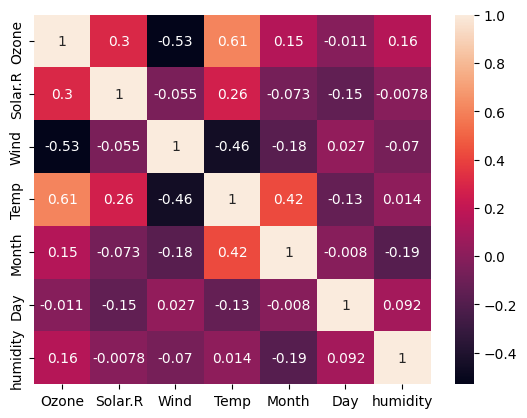

In [25]:
sns.heatmap(corr, annot=True)

In [26]:
from sklearn.model_selection import train_test_split

In [32]:
x = df[['Ozone']]
y = df[['Temp']]

In [33]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2)

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
LR = LinearRegression()

In [36]:
model = LR.fit(xtrain,ytrain)

In [37]:
ypredict = model.predict(xtest)

In [39]:
import matplotlib.pyplot as plt

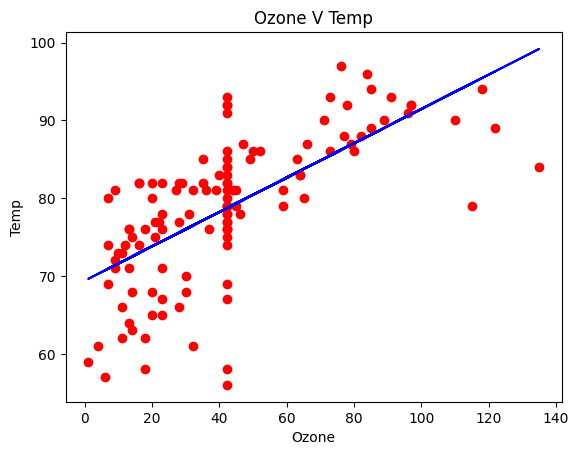

In [40]:
plt.scatter(xtrain, ytrain, color="red")
plt.plot(xtrain,LR.predict(xtrain) , color="blue")
plt.xlabel('Ozone')
plt.ylabel('Temp')
plt.title('Ozone V Temp')
plt.show()

In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [45]:
MSE = mean_squared_error(ytest,ypredict)

In [46]:
MSE

92.52720947364196

In [47]:
MAE = mean_absolute_error(ytest,ypredict)

In [48]:
MAE

7.273440255630634

In [49]:
R2 = r2_score(ytest,ypredict)

In [50]:
R2

-0.09740883548700308

In [51]:
import numpy as np

In [52]:
np.sqrt(MSE)

9.619106480003325